In [21]:
import pandas as pd
import numpy as np

from datasets import load_dataset

dataset1 = load_dataset("dair-ai/emotion", "unsplit")
dataset1



DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 416809
    })
})

In [22]:
# Try reading with error handling options
dataset2 = pd.read_csv("train.csv", on_bad_lines='skip')
dataset2

,conv_id,utterance_idx,context,prompt,speaker_idx,utterance,selfeval,tags
0,hit:0_conv:1,1,sentimental,I remember going to the fireworks with my best...,1,I remember going to see the fireworks with my ...,5|5|5_2|2|5,NaN
1,hit:0_conv:1,2,sentimental,I remember going to the fireworks with my best...,0,Was this a friend you were in love with_comma_...,5|5|5_2|2|5,NaN
2,hit:0_conv:1,3,sentimental,I remember going to the fireworks with my best...,1,This was a best friend. I miss her.,5|5|5_2|2|5,NaN
3,hit:0_conv:1,4,sentimental,I remember going to the fireworks with my best...,0,Where has she gone?,5|5|5_2|2|5,NaN
4,hit:0_conv:1,5,sentimental,I remember going to the fireworks with my best...,1,We no longer talk.,5|5|5_2|2|5,NaN
...,...,...,...,...,...,...,...,...
76663,hit:12424_conv:24848,5,sentimental,I found some pictures of my grandma in the att...,389,Yeah reminds me of the good old days. I miss ...,5|5|5_5|5|5,NaN
76664,hit:12424_conv:24849,1,surprised,I woke up this morning to my wife telling me s...,294,I woke up this morning to my wife telling me s...,5|5|5_5|5|5,NaN
76665,hit:12424_conv:24849,2,surprised,I woke up this morning to my wife telling me s...,389,Oh hey that's awesome! That is awesome right?,5|5|5_5|5|5,NaN
76666,hit:12424_conv:24849,3,surprised,I woke up this morning to my wife telling me s...,294,It is soooo awesome. We have been wanting a b...,5|5|5_5|5|5,NaN


In [23]:
# Convert dataset1 to dataframe
df1 = pd.DataFrame(dataset1['train'])

# dataset2 is already a dataframe, but let's assign it to df2 for consistency
df2 = dataset2

print("Dataset 1 shape:", df1.shape)
print("Dataset 2 shape:", df2.shape)


Dataset 1 shape: (416809, 2)
Dataset 2 shape: (76668, 8)


In [24]:
# Create a mapping dictionary for emotions
emotion_map = {
    0: 'sadness',
    1: 'joy', 
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
}

# Map the numeric labels to emotion names
df1['label'] = df1['label'].map(emotion_map)

# Display the transformed dataframe
df1


,text,label
0,i feel awful about it too because it s my job ...,sadness
1,im alone i feel awful,sadness
2,ive probably mentioned this before but i reall...,joy
3,i was feeling a little low few days back,sadness
4,i beleive that i am much more sensitive to oth...,love
...,...,...
416804,that was what i felt when i was finally accept...,joy
416805,i take every day as it comes i m just focussin...,fear
416806,i just suddenly feel that everything was fake,sadness
416807,im feeling more eager than ever to claw back w...,joy


In [25]:
# Keep only 'utterance' and 'context' columns from df2
df2 = df2[['utterance', 'context']]
df2

,utterance,context
0,I remember going to see the fireworks with my ...,sentimental
1,Was this a friend you were in love with_comma_...,sentimental
2,This was a best friend. I miss her.,sentimental
3,Where has she gone?,sentimental
4,We no longer talk.,sentimental
...,...,...
76663,Yeah reminds me of the good old days. I miss ...,sentimental
76664,I woke up this morning to my wife telling me s...,surprised
76665,Oh hey that's awesome! That is awesome right?,surprised
76666,It is soooo awesome. We have been wanting a b...,surprised


In [26]:
# Rename columns in df2 to match df1's structure
df2 = df2.rename(columns={'utterance': 'text'})

# Concatenate the dataframes
combined_df = pd.concat([df1, df2], ignore_index=True)

# Combine context and label columns, keeping the original label where context is NaN
combined_df['label'] = combined_df['label'].fillna(combined_df['context'])

# Drop the now redundant context column
combined_df = combined_df.drop('context', axis=1)

# Display the combined dataframe
combined_df




,text,label
0,i feel awful about it too because it s my job ...,sadness
1,im alone i feel awful,sadness
2,ive probably mentioned this before but i reall...,joy
3,i was feeling a little low few days back,sadness
4,i beleive that i am much more sensitive to oth...,love
...,...,...
493472,Yeah reminds me of the good old days. I miss ...,sentimental
493473,I woke up this morning to my wife telling me s...,surprised
493474,Oh hey that's awesome! That is awesome right?,surprised
493475,It is soooo awesome. We have been wanting a b...,surprised


In [27]:
# Display unique values in the label column
print("Unique values in label column:")
print(combined_df['label'].unique())
print("Count of unique labels:", len(combined_df['label'].unique()))


Unique values in label column:
['sadness' 'joy' 'love' 'anger' 'fear' 'surprise' 'sentimental' 'afraid'
 'proud' 'faithful' 'terrified' 'joyful' 'angry' 'sad' 'jealous'
 'grateful' 'prepared' 'embarrassed' 'excited' 'annoyed' 'lonely'
 'ashamed' 'guilty' 'surprised' 'nostalgic' 'confident' 'furious'
 'disappointed' 'caring' 'trusting' 'disgusted' 'anticipating' 'anxious'
 'hopeful' 'content' 'impressed' 'apprehensive' 'devastated']
Count of unique labels: 38


In [28]:

# Get texts with more than 128 words
long_texts_df = combined_df[combined_df['text'].str.split().str.len() > 128]

print(f"\nNumber of rows with >128 words: {len(long_texts_df)}")
combined_df.shape



Number of rows with >128 words: 47


(493477, 2)

In [29]:
# Function to count words
combined_df['word_count'] = combined_df['text'].apply(lambda x: len(str(x).split()))

# Remove rows where word count > 128
df_filtered = combined_df[combined_df['word_count'] <= 128]

# Drop the helper column
df_filtered = df_filtered.drop(columns=['word_count'])
# Reset the index of the filtered dataframe
df_filtered = df_filtered.reset_index(drop=True)

df_filtered


,text,label
0,i feel awful about it too because it s my job ...,sadness
1,im alone i feel awful,sadness
2,ive probably mentioned this before but i reall...,joy
3,i was feeling a little low few days back,sadness
4,i beleive that i am much more sensitive to oth...,love
...,...,...
493425,Yeah reminds me of the good old days. I miss ...,sentimental
493426,I woke up this morning to my wife telling me s...,surprised
493427,Oh hey that's awesome! That is awesome right?,surprised
493428,It is soooo awesome. We have been wanting a b...,surprised


In [30]:
# Map similar emotion labels to 'sadness'
df_filtered['label'] = df_filtered['label'].replace(['sad', 'devastated', 'disappointed'], 'sadness')
# Map similar emotion labels to 'joy'
df_filtered['label'] = df_filtered['label'].replace(['joyful', 'content', 'proud', 'grateful'], 'joy')
# Map similar emotion labels to 'love'
df_filtered['label'] = df_filtered['label'].replace(['caring', 'trusting', 'faithful'], 'love')
# Map similar emotion labels to 'fear'
df_filtered['label'] = df_filtered['label'].replace(['afraid', 'terrified', 'anxious', 'apprehensive'], 'fear')
# Map similar emotion labels to 'surprise'
df_filtered['label'] = df_filtered['label'].replace(['surprised'], 'surprise')
# Map similar emotion labels to 'embarrassed'
df_filtered['label'] = df_filtered['label'].replace(['ashamed', 'guilty'], 'embarrassed')
# Map similar emotion labels to 'anticipating'
df_filtered['label'] = df_filtered['label'].replace(['hopeful', 'excited', 'prepared'], 'anticipating')
# Map similar emotion labels to 'anger'
df_filtered['label'] = df_filtered['label'].replace(['angry', 'furious'], 'anger')


df_filtered


,text,label
0,i feel awful about it too because it s my job ...,sadness
1,im alone i feel awful,sadness
2,ive probably mentioned this before but i reall...,joy
3,i was feeling a little low few days back,sadness
4,i beleive that i am much more sensitive to oth...,love
...,...,...
493425,Yeah reminds me of the good old days. I miss ...,sentimental
493426,I woke up this morning to my wife telling me s...,surprise
493427,Oh hey that's awesome! That is awesome right?,surprise
493428,It is soooo awesome. We have been wanting a b...,surprise


In [31]:
# Display unique values in the label column
print("Unique values in label column:")
print(df_filtered['label'].unique())
print("Count of unique labels:", len(df_filtered['label'].unique()))

Unique values in label column:
['sadness' 'joy' 'love' 'anger' 'fear' 'surprise' 'sentimental' 'jealous'
 'anticipating' 'embarrassed' 'annoyed' 'lonely' 'nostalgic' 'confident'
 'disgusted' 'impressed']
Count of unique labels: 16


In [35]:
# Get labels with counts more than 15000
labels_to_reduce = label_counts[label_counts > 15000].index

# Reduce rows for these labels to 15000 each
df_reduced = pd.DataFrame()
for label in df_filtered['label'].unique():
    label_data = df_filtered[df_filtered['label'] == label]
    if label in labels_to_reduce:
        label_data = label_data.sample(n=15000, random_state=42)
    df_reduced = pd.concat([df_reduced, label_data])

# Reset index of final dataframe
df_filtered = df_reduced.reset_index(drop=True)

# Print updated label counts
print("\nUpdated label distribution:")
print(df_filtered['label'].value_counts())



Updated label distribution:
label
sadness         15000
joy             15000
love            15000
anger           15000
fear            15000
surprise        15000
anticipating    10065
embarrassed      6623
annoyed          2640
lonely           2502
disgusted        2447
confident        2438
impressed        2378
nostalgic        2350
jealous          2328
sentimental      2073
Name: count, dtype: int64


In [36]:
df_filtered.shape

(125844, 2)

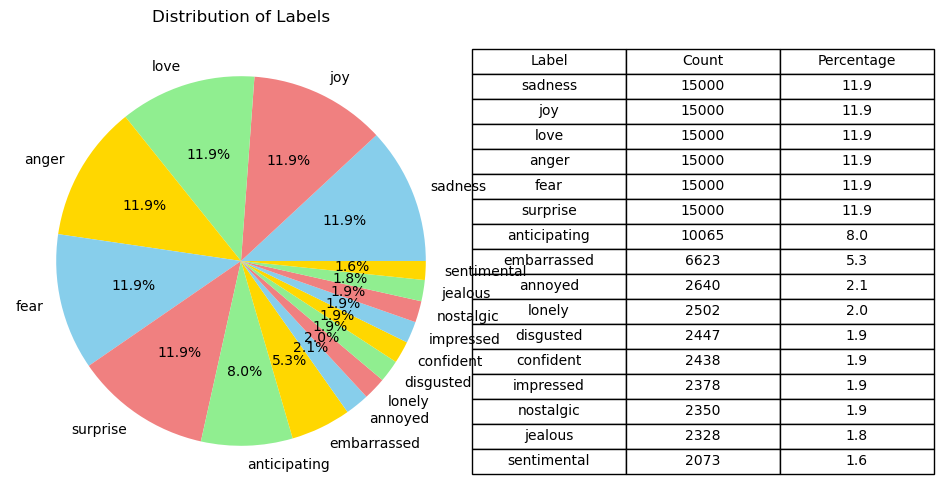

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Count values
label_counts = df_filtered['label'].value_counts()
percentages = (label_counts / label_counts.sum()) * 100  # Convert to percentage

# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))

# Pie chart
ax.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
ax.set_title("Distribution of Labels")

# Create a table
table_data = {'Label': label_counts.index, 'Count': label_counts.values, 'Percentage': percentages.round(1)}
table_df = pd.DataFrame(table_data)

# Add table to plot
table = plt.table(cellText=table_df.values, colLabels=table_df.columns, cellLoc='center', loc='right')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

# Show plot
plt.show()